<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    
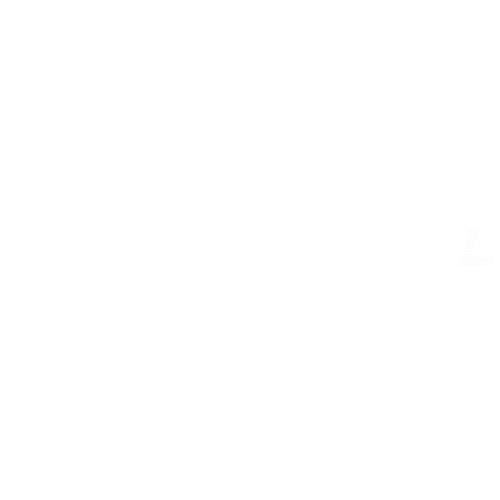
    
# YIELD MONITOR DATA ANALYSIS 
--------------------------------------------------------
## Introduction
    "From the field comes the yield."

Farmers and growers have precision agricultural technologies capturing large amounts of data.<br>
Successfully integrating ag technology on to NC farms requires melding data streams with basic agronomics to improve on-ground management. Distilling the accumulating silos of ag data into meaningful kernels may prove tougher than scavenging the data itself.

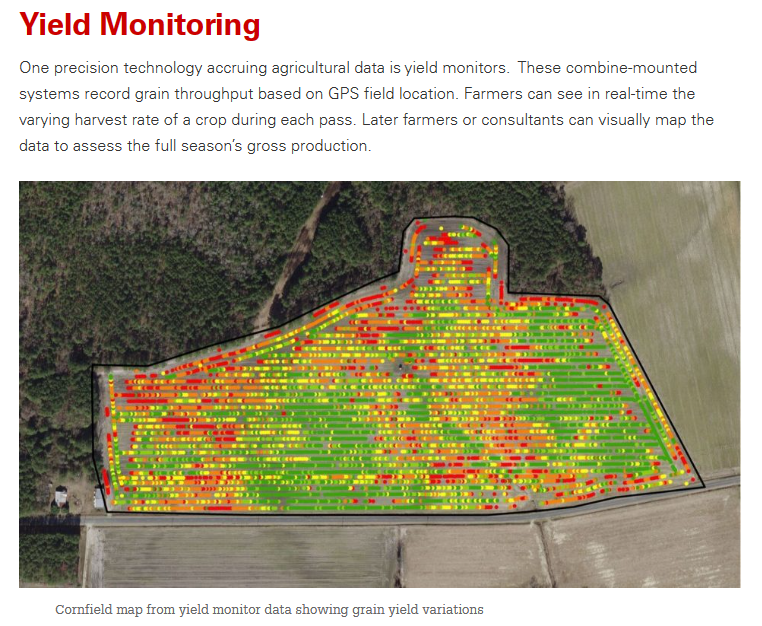

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    
## Learning Objectives
 1. Import yield data
 2. Perform Exploratory Data Analysis (EDA)
 3. Explore yield tabular data with tables & charts \ plots & maps
 4. Learn and implement GIS/geospatial data visualization and analysis operations
    
</span>


-------------------------------------------------------------------------


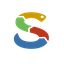

<span style="font-family:Dubai; color:#555555;">
    
## SoS----> A Brief Introduction to SoS Notebook
    
This particular Jupyter Notebook is very special in that it proffers the ability to run code in several different coding languages - all from this one notebook!
- SoS = Scripts of Scripts
- Its foundation is in Python
- Its "SoS" kernel can power the sharing of stored variables amongst the different languages

We will in this tutorial use:
 - R
 - Bash
 - Python
</span>

In [ ]:
# get a list of available sos languages
%use


-------------------------------------------------------------------------


<span style="font-family:Didactic Gothic; color:black;">

# I. Quick preview of sample yield data file
Before we delve into Exploratory Data Analysis, let's first have a quick look at what a yield dataset can contain. 
    <br>Let's preview our sample data – in a .csv text file format - here in this SoS Notebook using a built-in piece of code that performs a specific task (also known as a function) to bring in data and display it in an easy-to-read way.
</span>

<span style="font-family:Didactic Gothic; color:black;">
    The code snippet below is a Bash language "magic" function called <i>preview</i> and we call it in the SoS framework using a % sign before it. This magic reads data from a tabular text file – like our csv – and previews it as a sortable and searchable table. (The `-n` option tells the magic to display the result in the main notebook, not in the SoS side panel.)
</span>

In [1]:
%preview -n RAW-DATA.csv

> RAW-DATA.csv (3.1 MiB):

,Longitude,Latitude,Field,Dataset,Product,Obj. Id,Swth Wdth(ft),Distance(ft),Duration(s),Track(deg),Elevation(ft),Area Count,Time,Y Offset(ft),Pass Num,Moisture(%),Eng Load(%),Yld Mass(Wet)(lb/ac),Yld Mass(Dry)(lb/ac),Crop Flw(M)(lb/s),Yld Vol(Dry)(bu/ac),Yld Vol(Wet)(bu/ac),Speed(mph),Prod(ac/h),Crop Flw(V)(bu/h),Date
0,-81.495889,35.944594,bif field,2021_06_18_001 (13078),WHEAT,1,29.99,3.904,1.0,200.960,1156.1,On,6/18/2021,0.0,2,6.720,4649.4,1680.30,1680.30,4.516,31.120,31.120,2.662,9.676,301.08,6/18/2021
1,-81.495882,35.944610,bif field,2021_06_18_001 (13078),WHEAT,2,29.99,4.265,1.0,214.190,1156.1,On,6/18/2021,0.0,2,6.720,5202.9,2451.20,2451.20,7.197,45.390,45.390,2.908,10.570,479.79,6/18/2021
2,-81.495865,35.944630,bif field,2021_06_18_001 (13078),WHEAT,3,29.99,4.462,1.0,214.190,1156.8,On,6/18/2021,0.0,2,6.737,5202.9,3238.90,3238.90,9.949,59.980,59.980,3.042,11.060,663.25,6/18/2021
3,-81.495865,35.944630,bif field,2021_06_18_001 (13078),WHEAT,4,29.99,4.528,1.0,221.840,1156.8,On,6/18/2021,0.0,2,6.737,5202.9,3880.40,3880.40,12.090,71.860,71.860,3.087,11.220,806.29,6/18/2021
4,-81.495854,35.944640,bif field,2021_06_18_001 (13078),WHEAT,5,29.99,4.626,1.0,221.840,1162.4,On,6/18/2021,0.0,2,6.758,5300.0,3496.30,3496.30,11.130,64.750,64.750,3.154,11.460,742.28,6/18/2021
5,-81.495848,35.944645,bif field,2021_06_18_001 (13078),WHEAT,6,29.99,4.626,1.0,233.910,1162.4,On,6/18/2021,0.0,2,6.758,5300.0,3046.90,3046.90,9.703,56.420,56.420,3.154,11.460,646.87,6/18/2021
6,-81.495848,35.944645,bif field,2021_06_18_001 (13078),WHEAT,7,29.99,4.528,1.0,233.910,1165.4,On,6/18/2021,0.0,2,6.793,5300.0,2172.10,2172.10,6.770,40.220,40.220,3.087,11.220,451.34,6/18/2021
7,-81.495820,35.944662,bif field,2021_06_18_001 (13078),WHEAT,8,29.99,4.495,1.0,218.990,1165.4,On,6/18/2021,0.0,2,6.793,5202.1,1889.00,1889.00,5.845,34.980,34.980,3.065,11.140,389.66,6/18/2021
8,-81.495797,35.944685,bif field,2021_06_18_001 (13078),WHEAT,9,29.99,4.560,1.0,218.990,1168.3,On,6/18/2021,0.0,2,6.800,5202.1,1248.50,1248.50,3.919,23.120,23.120,3.109,11.300,261.29,6/18/2021
9,-81.495797,35.944685,bif field,2021_06_18_001 (13078),WHEAT,10,29.99,4.626,1.0,212.590,1168.3,On,6/18/2021,0.0,2,6.800,5202.1,993.44,993.44,3.164,18.400,18.400,3.154,11.460,210.91,6/18/2021



-------------------------------------------------------------------------


<span style="font-family:Didactic Gothic; color:black;">
    
# II. EDA: Exploratory Data Analysis
</span>

<span style="font-family:Corbel; color:black; font-size:16px;">
<b>After that "magical" preview, we can see we have got our work cut out for us with understanding what all is going on in that 16,000+ row yield monitor raw data table!
    </b><br>
Thus, for our EDA operations, we will utilize *both* of the two main and most popular data analysis coding languages: R & Python.

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
<b>1. Let's load in a Python package called pandas to view the sample yield data table:</b>

In [2]:
%use python3
# Using Python
import pandas


## Who knew that Pythons and Pandas got along?! 
##  Wellll... maybe only here in the Data Analysis world. 

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>2. Using pandas capabilities to read our csv data to us, we can store it in a variable `data`:

In [3]:
%use python3
# Using Python
data = pandas.read_csv('RAW-DATA.csv')

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>3. Print the stored data table:

In [8]:
%use python3
# Using Python
data

,Longitude,Latitude,Field,Dataset,Product,Obj. Id,Swth Wdth(ft),Distance(ft),Duration(s),Track(deg),...,Eng Load(%),Yld Mass(Wet)(lb/ac),Yld Mass(Dry)(lb/ac),Crop Flw(M)(lb/s),Yld Vol(Dry)(bu/ac),Yld Vol(Wet)(bu/ac),Speed(mph),Prod(ac/h),Crop Flw(V)(bu/h),Date
0,-81.495889,35.944594,bif field,2021_06_18_001 (13078),WHEAT,1,29.99,3.904,1.0,200.96,...,4649.4,1680.30,1680.30,4.516,31.12,31.12,2.662,9.676,301.08,6/18/2021
1,-81.495882,35.944610,bif field,2021_06_18_001 (13078),WHEAT,2,29.99,4.265,1.0,214.19,...,5202.9,2451.20,2451.20,7.197,45.39,45.39,2.908,10.570,479.79,6/18/2021
2,-81.495865,35.944630,bif field,2021_06_18_001 (13078),WHEAT,3,29.99,4.462,1.0,214.19,...,5202.9,3238.90,3238.90,9.949,59.98,59.98,3.042,11.060,663.25,6/18/2021
3,-81.495865,35.944630,bif field,2021_06_18_001 (13078),WHEAT,4,29.99,4.528,1.0,221.84,...,5202.9,3880.40,3880.40,12.090,71.86,71.86,3.087,11.220,806.29,6/18/2021
4,-81.495854,35.944640,bif field,2021_06_18_001 (13078),WHEAT,5,29.99,4.626,1.0,221.84,...,5300.0,3496.30,3496.30,11.130,64.75,64.75,3.154,11.460,742.28,6/18/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16312,-81.496278,35.943422,bif field,L8:2021_06_18_001 (13078),WHEAT,3360,29.99,6.529,1.0,55.77,...,3464.8,986.43,986.43,4.434,18.27,18.27,4.452,16.180,295.57,6/19/2021
16313,-81.496278,35.943422,bif field,L8:2021_06_18_001 (13078),WHEAT,3361,29.99,6.562,1.0,55.77,...,3464.8,772.55,772.55,3.490,14.31,14.31,4.474,16.260,232.64,6/19/2021
16314,-81.496312,35.943403,bif field,L8:2021_06_18_001 (13078),WHEAT,3362,29.99,6.430,1.0,80.42,...,3743.4,696.79,696.79,3.084,12.90,12.90,4.384,15.940,205.63,6/19/2021
16315,-81.496360,35.943397,bif field,L8:2021_06_18_001 (13078),WHEAT,3363,29.99,6.463,1.0,80.42,...,3743.4,622.81,622.81,2.771,11.53,11.53,4.407,16.020,184.74,6/19/2021


<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>What else can we do with pandas? Can we run a summary on each column to get a better idea of the data?:
    <p>
        Or, we can just use the data to R - the Statistical Language - because it has a dependable summary function.


-------------------------------------------------------------------------


<span style="font-family:Didactic Gothic; color:black;">
    
## EDA: Exploratory Data Analysis, cont'd...
<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>1. Command R to read the yield data table and then just print a summary of each column as part of our EDA process:</b>
</span>

In [6]:
%use R
# Using R
yielddata <- read.csv("RAW-DATA.csv")
summary(yielddata)

   Longitude         Latitude        Field             Dataset         
 Min.   :-81.50   Min.   :35.94   Length:16317       Length:16317      
 1st Qu.:-81.50   1st Qu.:35.94   Class :character   Class :character  
 Median :-81.50   Median :35.94   Mode  :character   Mode  :character  
 Mean   :-81.50   Mean   :35.94                                        
 3rd Qu.:-81.50   3rd Qu.:35.95                                        
 Max.   :-81.49   Max.   :35.95                                        
   Product             Obj..Id     Swth.Wdth.ft.    Distance.ft.   
 Length:16317       Min.   :   1   Min.   :29.99   Min.   : 0.787  
 Class :character   1st Qu.: 680   1st Qu.:29.99   1st Qu.: 5.052  
 Mode  :character   Median :1445   Median :29.99   Median : 5.643  
                    Mean   :1697   Mean   :29.99   Mean   : 5.673  
                    3rd Qu.:2465   3rd Qu.:29.99   3rd Qu.: 6.234  
                    Max.   :5126   Max.   :29.99   Max.   :15.520  
  Duration.s.      T

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>Ugh, that is kind of a mess.


-------------------------------------------------------------------------


<span style="font-family:Didactic Gothic; color:black;">
    
## EDA: Exploratory Data Analysis, cont'd...
<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>Let's just examine the column names...</b>
</span>

In [7]:
%use R
# Using R
names(yielddata) 

[1] "Longitude"            "Latitude"             "Field"               
 [4] "Dataset"              "Product"              "Obj..Id"             
 [7] "Swth.Wdth.ft."        "Distance.ft."         "Duration.s."         
[10] "Track.deg."           "Elevation.ft."        "Area.Count"          
[13] "Time"                 "Y.Offset.ft."         "Pass.Num"            
[16] "Moisture..."          "Eng.Load..."          "Yld.Mass.Wet..lb.ac."
[19] "Yld.Mass.Dry..lb.ac." "Crop.Flw.M..lb.s."    "Yld.Vol.Dry..bu.ac." 
[22] "Yld.Vol.Wet..bu.ac."  "Speed.mph."           "Prod.ac.h."          
[25] "Crop.Flw.V..bu.h."    "Date"

In [ ]:
# Oi vey! So many!
## But at least they are descriptive.

<span style="font-family:Didactic Gothic; color:black;">
    
## EDA :: What columns do we think are relevant?
    
    - Could data benefit from being cleaned? How?
     From a yield map quality perspective:
        - Based on Speed
        - Based on Yield
    
</span>

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>some words:

In [ ]:
%use R
("----------Yield---------------------------------")
maxyield <- max(wheatdata$Yld.Mass.Dry..lb.ac.)
minyield <- min(wheatdata$Yld.Mass.Dry..lb.ac.)
paste("The maximum yield value is: ", maxyield, "lb/ac")
paste("The minimum yield value is: ", minyield, "lb/ac")
("----------Speed---------------------------------")
maxspeed <- max(wheatdata$Speed.mph.)
minspeed <- min(wheatdata$Speed.mph.)
paste("The maximum speed value is: ", maxspeed, "mph")
paste("The minimum speed value is: ", minspeed, "mph")

<span style="font-family:Didactic Gothic; color: #2F4F4F;">
    <b>some words:


-------------------------------------------------------------------------


<span style="font-family:Dubai; color:black;">

# III. EDA through charts, plots, maps, ...OH MY!
</span>

Instead of displaying the result directly in the notebook, the R code saves the image in a file (so that it can be shared with others separately) and use the `%preview` magic to display it in the notebook. 


-------------------------------------------------------------------------



-------------------------------------------------------------------------


## Session Info

<span style="font-family:Cooper; font-size:18px; color: #2F4F4F;">   
> "As a good practice, a `%sessioninfo` magic should be used at the end of all SoS Notebooks <br> to show the session information of all kernels involved." <br>
</span>
<p style="font-family:Didactic Gothic; text-align:center;">  - Dr. Bo Peng, Creator of SoS ("Script of Scripts")
</p>

In [ ]:
%sessioninfo